## A2: Bias in Data
### Priyanka Bijlani
### October 22, 2020

This notebook performs 2 analyses on the Wikipedia Talk corpus. The first analysis focuses on labeling aggression. The second analysis focuses on comparing labeling behavior between aggression and toxicity.

### Analysis 1: Agression - Explore relationships between worker demographics and labeling behavior
#### Question:
How consistent are labeling behaviors among workers with different demographic profiles? Are older people more sensitive to aggressive tones? Are females more prone to marking content as aggressive?

I chose to perform this analysis on the Aggression dataset because I want to explore the sensitivity towards comments in gender and age range. There is a preconceived notion that males are more aggressive, but would that impact their labeling behavior as well? Also, as people get older they have more experience, but can the assumption that they would find classify comments as aggressive due to this factor be made. 

##### Dataset Setup
Download the aggression dataset from here: https://figshare.com/articles/dataset/Wikipedia_Talk_Labels_Aggression/4267550. There are three files to download. Be sure to save them in the same directory as the notebook for analysis. Import the pandas library in order to process the data as dataframes as shown below.

In [1]:
#Import pandas
import pandas as pd

#Read the csvs into dataframes
aggression_annotations = pd.read_csv("aggression_annotations.tsv", delimiter="\t")
aggression_annotated_comments = pd.read_csv("aggression_annotated_comments.tsv", delimiter="\t")
aggression_worker_demographics = pd.read_csv("aggression_worker_demographics.tsv", delimiter="\t")

##### Preview the data
Preview each dataframe that was converted from csv in separate cells to understand the available features and rows in the dataset.

In [2]:
#Preview annotations
aggression_annotations

,rev_id,worker_id,aggression,aggression_score
0,37675,1362,1.0,-1.0
1,37675,2408,0.0,1.0
2,37675,1493,0.0,0.0
3,37675,1439,0.0,0.0
4,37675,170,0.0,0.0
...,...,...,...,...
1365212,699897151,628,0.0,0.0
1365213,699897151,15,0.0,0.0
1365214,699897151,57,0.0,0.0
1365215,699897151,1815,0.0,0.0


In [3]:
#Preview comments
aggression_annotated_comments

,rev_id,comment,year,logged_in,ns,sample,split
0,37675,`-NEWLINE_TOKENThis is not ``creative``. Thos...,2002,True,article,random,train
1,44816,`NEWLINE_TOKENNEWLINE_TOKEN:: the term ``stand...,2002,True,article,random,train
2,49851,"NEWLINE_TOKENNEWLINE_TOKENTrue or false, the s...",2002,True,article,random,train
3,89320,"Next, maybe you could work on being less cond...",2002,True,article,random,dev
4,93890,This page will need disambiguation.,2002,True,article,random,train
...,...,...,...,...,...,...,...
115859,699848324,`NEWLINE_TOKENNEWLINE_TOKENNEWLINE_TOKENThese ...,2016,True,article,blocked,train
115860,699851288,NEWLINE_TOKENNEWLINE_TOKENThe Institute for Hi...,2016,True,article,blocked,test
115861,699857133,NEWLINE_TOKEN:The way you're trying to describ...,2016,True,article,blocked,train
115862,699891012,NEWLINE_TOKENNEWLINE_TOKEN== Warning ==NEWLINE...,2016,True,user,blocked,dev


In [4]:
#Preview demographics
aggression_worker_demographics

,worker_id,gender,english_first_language,age_group,education
0,833,female,0,45-60,bachelors
1,1072,male,0,30-45,bachelors
2,872,male,0,18-30,hs
3,2116,male,0,30-45,professional
4,453,male,0,30-45,hs
...,...,...,...,...,...
2185,1442,male,0,18-30,hs
2186,529,female,0,30-45,hs
2187,2036,female,0,18-30,masters
2188,393,female,0,18-30,masters


##### Join worker demographics dataset with annotations dataset

To answer the analysis question, we need to join the demographics dataframe with the annotations dataframe. That will provide a single dataframe that shows how many labels were made by workers with a breakdown of their demographics. Use the describe() method to see a summary of the resulting data. As seen below, the minimum aggression score is -3 and the maximum aggression score is 3. The overall mean for aggression score of the dataset is negative indicating a skew towards aggressive versus extremely postive comments.

In [5]:
#Merge demographics and annotations
worker_info = aggression_worker_demographics.merge(aggression_annotations, how="left", on='worker_id')

#See summary of dataframe
worker_info.describe()

,worker_id,english_first_language,rev_id,aggression,aggression_score
count,855514.000000,855514.000000,8.555140e+05,855514.000000,855514.00000
mean,1256.232936,0.132967,2.997570e+08,0.183242,-0.18862
std,990.328540,0.339539,1.983773e+08,0.386865,0.90641
min,0.000000,0.000000,3.767500e+04,0.000000,-3.00000
25%,435.000000,0.000000,1.264868e+08,0.000000,0.00000
50%,1007.000000,0.000000,2.697646e+08,0.000000,0.00000
75%,1898.000000,0.000000,4.589916e+08,0.000000,0.00000
max,4052.000000,1.000000,6.998972e+08,1.000000,3.00000


##### Exploratory Data Analysis
To conduct the analysis, first import the necessary packages that allow for plotting and visualizing the dataframes. Seaborn and matplotlib have plotting methods for multivariate scenarios such as plotting age groups, gender, and aggression score all in the same plot.

In [6]:
#Import seaborn and matplotlib packages for graphing/plotting
import seaborn as sns
from matplotlib import pyplot as plt

The first plot shows a count of labels grouped by age and gender. The gender is color-coded and the age groups are divided on the x-axis in bars. The height of each bar indicates the count of labels in that group.

In [7]:
#Generate csv for aggregation visualizations
worker_info.to_csv("aggression_visualizations.csv")

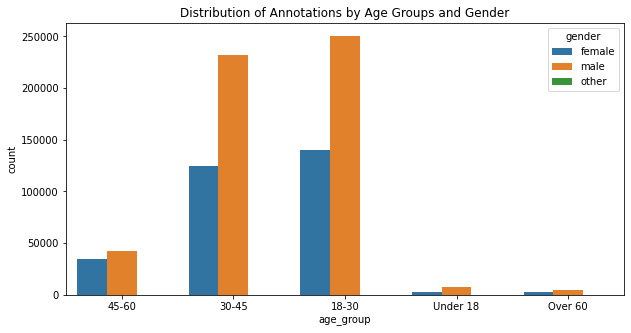

In [8]:
#Create bar chart for counts of labels
plt.figure(figsize=(10,5))
countplot = sns.countplot(x='age_group', data=worker_info, hue='gender')
plt.title("Distribution of Annotations by Age Groups and Gender")
plt.savefig("Aggression-CountPlot.png")

The plot below shows the distribution of labels for gender='other' and age range. As can be seen, this gender is of the age range 18-30.

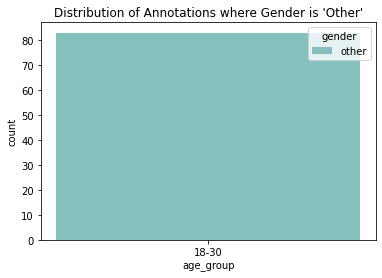

In [9]:
#Create bar chart for counts for gender=other
worker_info_othergender = worker_info[worker_info['gender'].eq('other')]
countplot = sns.countplot(x='age_group', data=worker_info_othergender, hue='gender', palette='GnBu')
plt.title("Distribution of Annotations where Gender is 'Other'")
plt.savefig("Aggression-OtherCount.png")

The plot below shows the Aggression Score normalized by count for each gender across age groups. The three columns in the chart represent the distribution for each gender. The age group is color-coded. Using the seaborn method called displot allows plotting of distribution normalized into density. The parameters specified allows encoding of age group, gender, and aggression score.

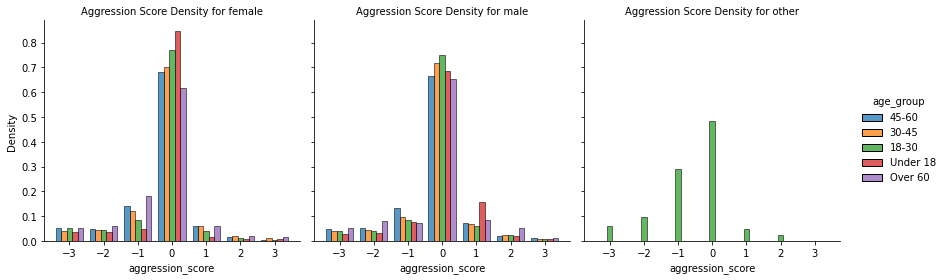

In [10]:
#Create distribution plot for Aggression labels
displot = sns.displot(worker_info, x='aggression_score', discrete=True, hue='age_group', multiple='dodge', stat="density", common_norm=False,shrink=0.8, height=4, aspect=1, col='gender')
displot.set_titles("Aggression Score Density for {col_name}")
plt.savefig("Aggression-DensityPlot.png")

##### Analysis Findings

The first plot "Distribution of Annotations by Age Groups and Gender" shows that the majority of labels come from the age groups of 30-45 and 18-30. Although there are labels from under 18 and over 60 year olds, they are much lower in number. This shows that the dataset is biased towards labels from normal adult age. Teenagers and seniors are not equally represented in labeling of aggression. This count plot also depicts gender representation in different colors. In every age group, males have the largest count in labels given for aggression. The green color which represents those who identify as "Other" is not visible in the count plot. 

When I plotted the count for 'other' gender, I saw that those who identify as 'other' were in the age range of 18-30 and there were only a total of 80 labels represented. This reveals another bias in the dataset. Since the gender representation is uneven it cannot be determined whether those who identify as 'Other' are more sensitive to aggression or not and whether that changes across age groups. Even when considering males and females, for the age groups 18-30 and 30-45, the number of males represented are almost double of the females. The dataset is more biased towards a male perspective of aggression.

To further analyze if gender and age groups play a role in sensitivity of labeling aggression, I plotted the normalized aggression scores for each age group and gender. By normalizing the data by count, I can get a clearer picture of whether a certain age group or gender is more senstive to aggression since they are not evenly represented in the dataset. There are some interesting patterns that can be observed in the plots such as the left tail (negative aggression score) of each plot is denser than the right tail (positive aggression score). This reveals an insightful point that negative labeling is more prevalent than positve labeling. The female and other gender plot have denser tails than the male aggression score plot. This can mean that females and those who identify as 'other' tend to be more sensitive in identifying aggression. Since the dataset is biased towards male representation, the aggression level of the overall data is therefore lower. If the dataset was more even in gender representation, more Wikipedia comments would have been classified as aggressive.

Similarly, age group bias is also prevalent in the dataset as can be seen in the plots for aggression score density. Those in the age range of over 60 have high bars for negative aggression scores for both males and females. However, as can be seen in the count plot, there are comparitively fewer labels from this age range. If the representation of the over 60 age range was larger, more posts would potentially be classified as aggressive. This dataset is biased towards the male adult interpretation of aggression.

### Analysis 2: Toxicity - 	Analyze the level of disagreement among crowdworkers around certain labels
#### Question:
Are some kinds of hostile speech harder for people to agree on than others? Do labelers tend to disagree more about 'aggression' versus 'toxicity'? Are the same patterns of demographic sensitivity visible in 'toxicity' labels as they are in 'aggression' labels?

I chose to perform this analysis on the Toxicity and Aggression datasets because these datasets are similar in structure yet they address different forms of hostile speech. It would be interesting to see whether toxicity and aggression are classified in a similar manner and whether their magnitude of presence differs in each dataset.

##### Dataset Setup
Download the aggression dataset from here: https://figshare.com/articles/dataset/Wikipedia_Talk_Labels_Toxicity/4563973. There are three files to download. Be sure to save them in the same directory as the notebook for analysis. Process the data into dataframes as shown below.

In [11]:
#Read the csv's into pandas dataframes
toxicity_annotations = pd.read_csv("toxicity_annotations.tsv", delimiter="\t")
toxicity_annotated_comments = pd.read_csv("toxicity_annotated_comments.tsv", delimiter="\t")
toxicity_worker_demographics = pd.read_csv("toxicity_worker_demographics.tsv", delimiter="\t")

##### Preview the data
Preview each dataframe that was converted from csv in separate cells to understand the available features and rows in the dataset.

In [12]:
#Preview annotations
toxicity_annotations

,rev_id,worker_id,toxicity,toxicity_score
0,2232.0,723,0,0.0
1,2232.0,4000,0,0.0
2,2232.0,3989,0,1.0
3,2232.0,3341,0,0.0
4,2232.0,1574,0,1.0
...,...,...,...,...
1598284,699897151.0,1550,0,0.0
1598285,699897151.0,1025,0,1.0
1598286,699897151.0,648,0,1.0
1598287,699897151.0,379,0,0.0


In [13]:
#Preview annotations
toxicity_annotated_comments

,rev_id,comment,year,logged_in,ns,sample,split
0,2232.0,This:NEWLINE_TOKEN:One can make an analogy in ...,2002,True,article,random,train
1,4216.0,`NEWLINE_TOKENNEWLINE_TOKEN:Clarification for ...,2002,True,user,random,train
2,8953.0,Elected or Electoral? JHK,2002,False,article,random,test
3,26547.0,`This is such a fun entry. DevotchkaNEWLINE_...,2002,True,article,random,train
4,28959.0,Please relate the ozone hole to increases in c...,2002,True,article,random,test
...,...,...,...,...,...,...,...
159681,699848324.0,`NEWLINE_TOKENNEWLINE_TOKENNEWLINE_TOKENThese ...,2016,True,article,blocked,train
159682,699851288.0,NEWLINE_TOKENNEWLINE_TOKENThe Institute for Hi...,2016,True,article,blocked,test
159683,699857133.0,NEWLINE_TOKEN:The way you're trying to describ...,2016,True,article,blocked,dev
159684,699891012.0,NEWLINE_TOKENNEWLINE_TOKEN== Warning ==NEWLINE...,2016,True,user,blocked,train


In [14]:
#Preview annotations
toxicity_worker_demographics

,worker_id,gender,english_first_language,age_group,education
0,85,female,0,18-30,bachelors
1,1617,female,0,45-60,bachelors
2,1394,female,0,NaN,bachelors
3,311,male,0,30-45,bachelors
4,1980,male,0,45-60,masters
...,...,...,...,...,...
3586,3189,female,0,18-30,bachelors
3587,1105,female,0,18-30,bachelors
3588,2192,female,1,Under 18,hs
3589,2692,female,0,30-45,hs


##### Join worker demographics dataset with annotations dataset for toxicity

To answer the analysis question, we need to join the demographics dataframe with the annotations dataframe for toxicity. This step was already completed for the aggression dataset. This will allow us to compare the magnitude of aggression and toxicity in the two datasets across age and gender.

In [15]:
#Merge demographics with annotations
toxicity_worker_info = toxicity_worker_demographics.merge(toxicity_annotations, how="left", on='worker_id')

#See summary of merged dataframe
toxicity_worker_info.describe()

,worker_id,english_first_language,rev_id,toxicity,toxicity_score
count,1.346955e+06,1.346955e+06,1.346955e+06,1.346955e+06,1.346955e+06
mean,1.947441e+03,1.735715e-01,3.005974e+08,1.457354e-01,2.105950e-01
std,1.198058e+03,3.787407e-01,1.987468e+08,3.528409e-01,7.702522e-01
min,0.000000e+00,0.000000e+00,2.232000e+03,0.000000e+00,-2.000000e+00
25%,9.030000e+02,0.000000e+00,1.263272e+08,0.000000e+00,0.000000e+00
50%,1.900000e+03,0.000000e+00,2.714939e+08,0.000000e+00,0.000000e+00
75%,2.939000e+03,0.000000e+00,4.606946e+08,0.000000e+00,1.000000e+00
max,4.300000e+03,1.000000e+00,6.998972e+08,1.000000e+00,2.000000e+00


##### Aggregate mean scores for each worker

To compare if aggression and toxicity are labeled in a similar or different fashion, the toxicity and aggression dataframes must be grouped by worker_id to find the mean scores for each worker assigned to each type of hostile speech.

In [16]:
toxicity_worker_info = toxicity_worker_info.groupby('worker_id').mean()
aggression_worker_info = worker_info.groupby('worker_id').mean()

##### Join aggregated mean scores for aggression and toxcicity 
Combine the aggregated means scores for each worker into a single dataframe to use for EDA.

In [17]:
#Merge aggregated mean scores into single dataframe
all_worker_info = toxicity_worker_info.merge(aggression_worker_info, how="inner", on='worker_id')

In [18]:
#Merge the combined dataframe with the common demographics dataframe
all_worker_info = all_worker_info.merge(toxicity_worker_demographics, how='left', on='worker_id')

##### Exploratory Data Analysis
The analysis questions requires us to analysis each hostile speech separately and together to see if any patterns exist between the way hostility and aggression are labeled. To do that we can plot the distributions of each hostile speech and then plot them together to see any gaps or overlaps. The interpretation of the gaps and overlaps provides insight into the analysis question.

In [19]:
#Generate csv for toxicity and aggression visualizations
all_worker_info.to_csv("aggressionToxicity_visualizations.csv")

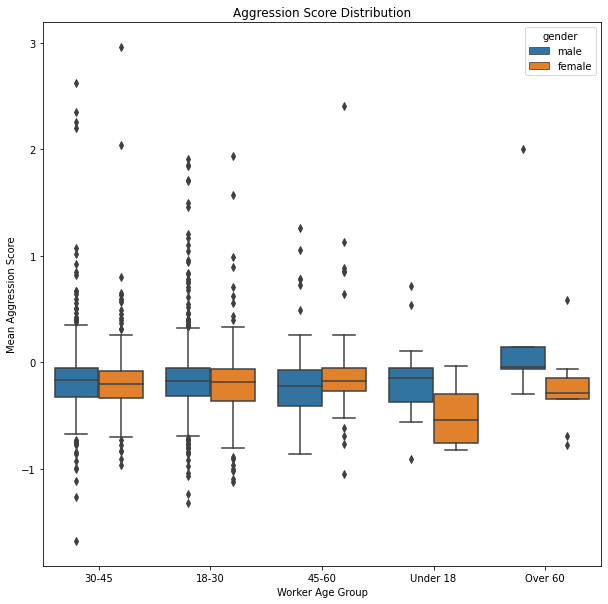

In [20]:
#Create a plot to show the distribution of aggregation scores for workers
plt.figure(figsize=(10,10))
sns.boxplot(data=all_worker_info, x='age_group',y='aggression_score', hue='gender')
plt.title("Aggression Score Distribution")
plt.ylabel("Mean Aggression Score")
plt.xlabel("Worker Age Group")
plt.savefig("Aggression-BoxPlot.png")

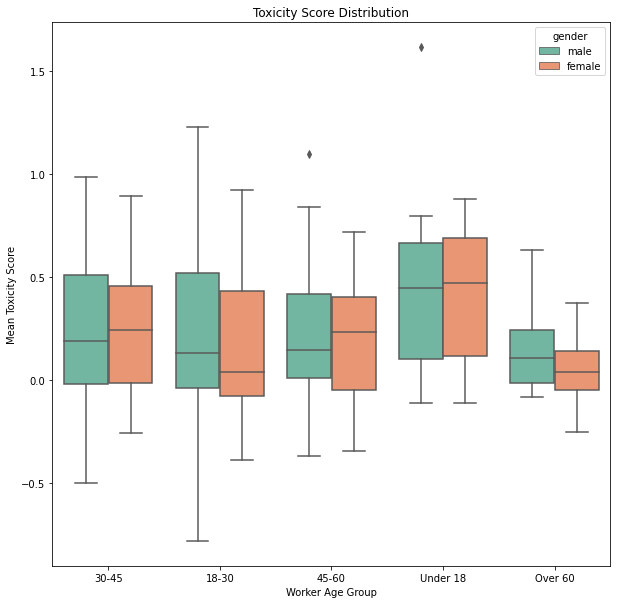

In [21]:
#Create a plot to show the distribution of toxicity scores for workers
plt.figure(figsize=(10,10))
sns.boxplot(data=all_worker_info, x='age_group',y='toxicity_score', hue='gender', palette="Set2")
plt.title("Toxicity Score Distribution")
plt.ylabel("Mean Toxicity Score")
plt.xlabel("Worker Age Group")
plt.savefig("Toxicity-BoxPlot.png")

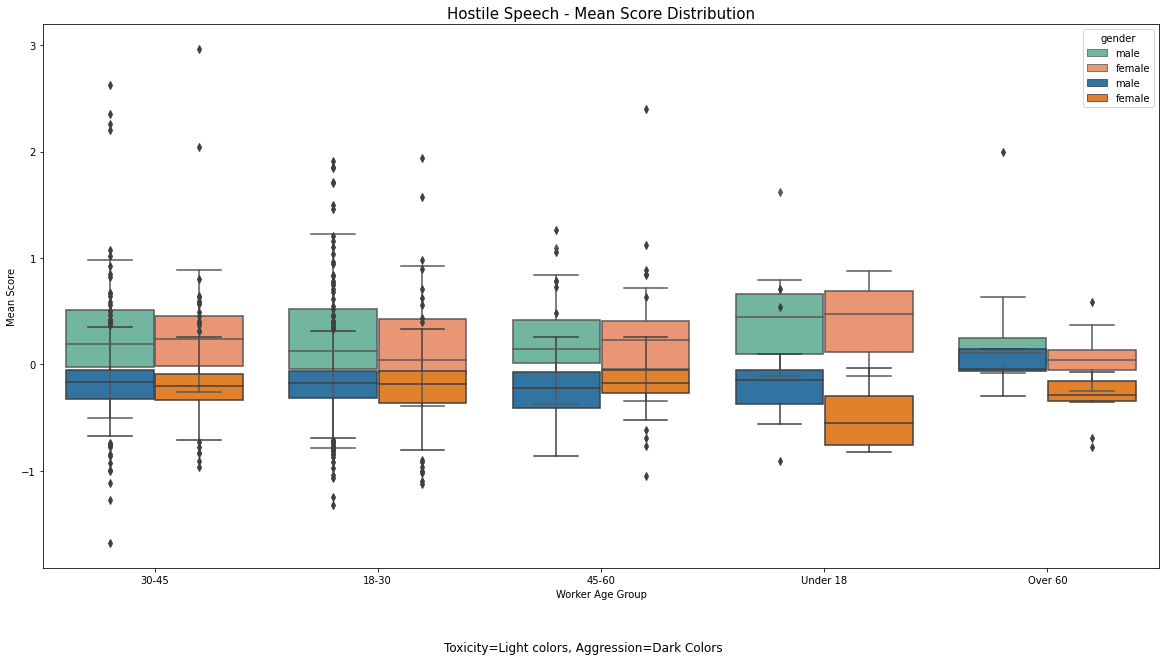

In [22]:
#Create a plot to show the distribution of toxicity and aggression scores for workers
plt.figure(figsize=(20,10))
sns.boxplot(data=all_worker_info, x='age_group',y='toxicity_score', hue='gender', palette="Set2")
sns.boxplot(data=all_worker_info, x='age_group',y='aggression_score', hue='gender')
txt = "Toxicity=Light colors, Aggression=Dark Colors"
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=12)
plt.title("Hostile Speech - Mean Score Distribution", fontsize=15)
plt.ylabel("Mean Score")
plt.xlabel("Worker Age Group")
plt.savefig("ToxicityAggressionBoxPlots.png")

##### Analysis Findings

The analysis of the toxicity and aggression datasets reveals insights about how labeling is not consistant across different types of hostile speech. To answer the analysis question, I first plotted a box plot of the distribution of workers and their mean scores of aggression and toxicity separately. These plots showed that similar patterns can be observed in toxicity as were observed in the previous analysis. In the largest representative group of 18-45 year olds, females have an overall lower mean for toxicity than males. The dataset is biased towards males which drives down the overall toxicity scores for the comments.

Individually there is a stark difference in how aggression is percieved versus how toxicity is percieved. The overall mean aggression scores are negative for all groups while the overall mean scores for toxicity are positive. This reveals a subtle bias in the diction of the questionarrie. The term aggression seems to spark a more sensitive reaction from labelers than toxicity. 

In order to compare the annotators' behavior in labeling aggression versus toxicity, I plotted the box plot distributions for aggression and toxicity on the same chart. This format was insightful as it revealed many hidden biases. The gaps between the box plots for toxicity (lighter color) and aggression (darker color) indicate the disagreement in labeling comments which are toxic versus aggressive. These gaps are evident in females aged 30-45, males aged 40-60, males and females under 18, and females over 60. This means that these particular groups distinguish aggression and toxicity with a distict difference. Both males and females under 18 show stark difference in categorizing aggression and toxicity. Since this age group is underrepresented in the dataset, this insight may not be accurate. The dataset is biased towards males in the age groups of 18-30 and 30-45. In these groups, the overall aggression and toxicity labeling behavior is consistant. The inconsistancies of the other box plots reveal the biased nature of the worker demographics.

#### Implications
##### Which, if any, of these demo applications would you expect the Perspective API—or any model trained on the Wikipedia Talk corpus—to perform well in? Why?

The Perspective API would likely perform well in the "Hot Topics" demo application. This application determines the probability of topics that may lead to heated discussions. I think the API would perform well here because the demographic bias has greater effect on individual comments rather than an overall topic. If a topic is deemed toxic or aggressive, it will be reflected similarly across age ranges and genders. The probablity piece of this application accounts for the subtle differences that the biased dataset does not capture.

##### Which, if any, of these demo applications would you expect the Perspective API to perform poorly in? Why?

The Perspective API would perform poorly in the "Authorship Feedback" application. Since the dataset is largely biased towards adult males, the feedback given for particular comments would reflect the interpretations of mostly adult males. Females or those who identify as 'other' are not equally represented in this dataset so any comments that they would label as aggresive and that males would not deem aggressive would show incorrect feedback. Also, the older generation of 60 plus is underrepresented so a comment they would deem as aggressive would not reflect in this application. Since this application evaluates comments individually, it would need a larger sample size of other gender and age groups to accurately label comments on the fly.

##### What are some potential unintended, negative consequences of using the Perspective API for any of these purposes? In your opinion, are these consequences likely or serious enough that you would recommend that the Perspective API not be used in these applications? Why or why not?

Some potential unintended, negative consequences of using the Perspective API for these applications may be that too many comments are flagged which will suppress rich conversation. If too many comments are flagged, it may deter people from engaging in any conversation about the articles at all which is counterproductive. Typos can be mistaken as aggression. Diction and language style may be misinterpreted as well which can lead to suppression of discussion. These consequences, however, are not severe enough that the Perspective API should not be used. If trained on a diverse and large dataset, the API can be polished to avoid overfitting and therefore not hamper constructive discussion.